<a href="https://colab.research.google.com/github/YEMISITEJU/DAT-540-USER-PROFILING-ON-YELP/blob/main/TEJU%20SENTIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT TOPIC: CAN YOU TELL ME THE SENTIMENT OF THE TWEET?


COURSE CODE:  DAT540

COURSE TITLE: INTRODUCTION TO DATA SCIENCE

GROUP NO: 2

TEACHING ASSISTANT: MATTHIAS ANTON SCHEDEL

GROUP MEMBER NAMES AND MODEL IMPLEMENTED :
- NOURIN MOHAMMAD HAIDER ALI BISWAS           :CNN,RNN

- OLGA GOLOVINA                               :DECISION TREE

- SARVIN TORKAMANZADEH                        :LOGISTIC REGRESSION

- YEMISI TEJU OLASOJI                         :NAIVE BAYES

- KONRAD KRYZYSZTOF JARCZYK                   :LOGISTIC REGRESSION

We unanimously agreed to explore 5 machine learning models so we can have a better comparison between the models and ultimately get the best one out with the highest accuracy. Each person actually went through all the project task and we later merged all our work together into one. Nourin collated all the codes into one jupyter notebook.

ABSTRACT

The objective of this project is to know how to perform exploratory analysis using real world datasets.Our focus was specifically on how to get the sentiment out from twitter posts. The underlining tone behind a tweet could be either positive or negative which is actually a classification problem.
During the course of this project, we designed a research plan, performed preprocessing tasks, prepared input for the models, selected an algorithm each and trained the model, interpreted the results and the last stage was evaluating and reporting the outcomes scientifically.



STEP 1: Importing the dataset  
The csv file was downloaded from kaggle via the link provided as a dataframe using Pandas.The dataset(sentiment140 dataset) contains 1,600,000 tweets with 2 basic sentiment classification i.e (0 = Negative, 4 = Positive) and they can be used to detect the emotional undertone of a given tweet. We had to upload the dataset onto google drive and mount the drive into collab notebook because of the very large size.
The dataset has 6 fields/columns which are:


1. target: the polarity of the tweet (0 = negative, 4 = positive)
2. ids: The id of the tweet e.g.(2087)
3. date: the date of the tweet e.g(Sat May 16 23:58:44 UTC 2009)
4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.
5. user: the user that tweeted e.g(robotickilldozr)
6. text: the text of the tweet e.g(Lyx is cool)

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Specify the file path in Google Colab (use the correct file name)
file_path = '/content/drive/My Drive/DATA/training.1600000.processed.noemoticon.csv' # Update this with the actual file name

columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
dataset_encoding = 'ISO-8859-1'

# Read the CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)


In [ ]:
# Import the required libraries

import pandas as pd

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string


In [ ]:
#To check five samples out
df.sample(5)

,target,ids,date,flag,user,text
632271,0,2232615499,Thu Jun 18 20:09:16 PDT 2009,NO_QUERY,JojoMCRgal,burnt my tongue
734850,0,2264644652,Sun Jun 21 04:31:00 PDT 2009,NO_QUERY,luckyduh,Ugh! I just broke 65 dollars worth of glass ja...
1574203,4,2189209937,Mon Jun 15 23:29:53 PDT 2009,NO_QUERY,xAllY13x,home from my weekend trip to MI...had soOo muc...
201086,0,1971816802,Sat May 30 07:57:51 PDT 2009,NO_QUERY,NiceCleanWhite,last day here
1253324,4,1996878148,Mon Jun 01 15:51:17 PDT 2009,NO_QUERY,yoshi831,@CrunchyK http://twitpic.com/6fg2b I spy with ...


In [ ]:
#To gain a quick overview of the central tendencies and spread of the dataset.
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
print('Dataset size {}'.format(len(df)))
print(df.columns)
print(df.dtypes)
print('Dataset first two rows:\n{}'.format(df.sample(2)))


Dataset size 1600000
Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')
target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object
Dataset first two rows:
        target         ids                          date      flag       user  \
205094       0  1972788200  Sat May 30 09:53:18 PDT 2009  NO_QUERY    jer1990   
108516       0  1824304097  Sun May 17 00:49:19 PDT 2009  NO_QUERY  beanswife   

                                                     text  
205094  @MummaBear Hulu is for the USA, not the Britis...  
108516  @elizapatricia  bean said you are home from ke...  


In [ ]:
 #To display the data types of each column in a DataFrame.
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

target
0    800000
4    800000
dtype: int64


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

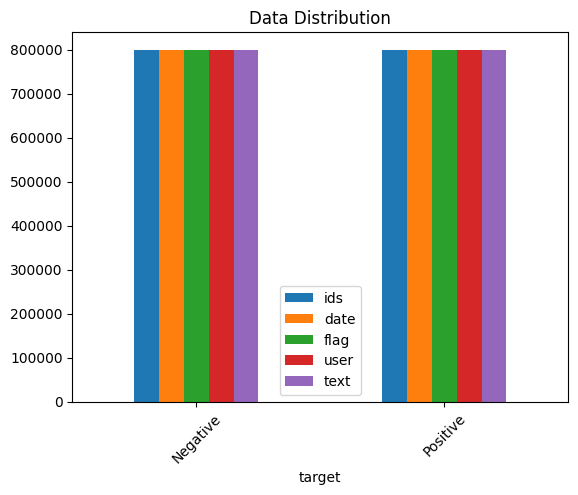

In [ ]:
# Plotting the distribution for dataset.
print(df.value_counts('target'))
ax = df.groupby('target').count().plot(kind='bar', title='Data Distribution',legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=45)

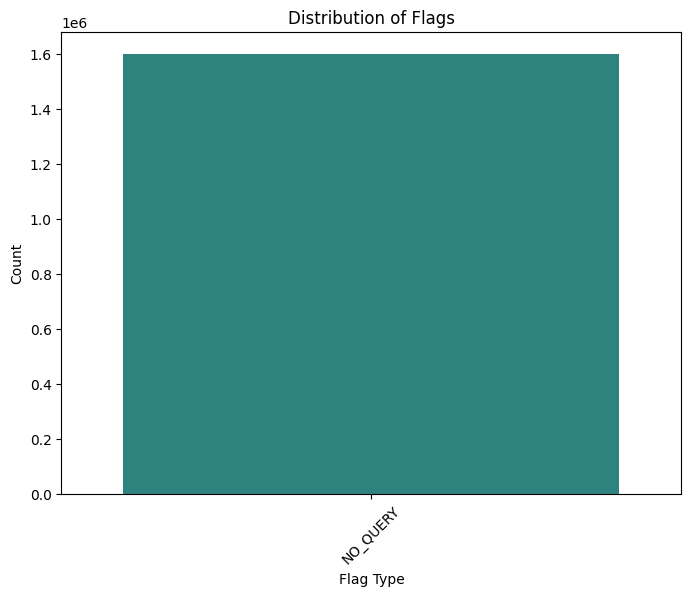

In [ ]:
# To Plot the data distribution of the 'flag' column using a count plot

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='flag', palette='viridis')  # 'viridis' is a color palette
plt.title('Distribution of Flags')
plt.xlabel('Flag Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


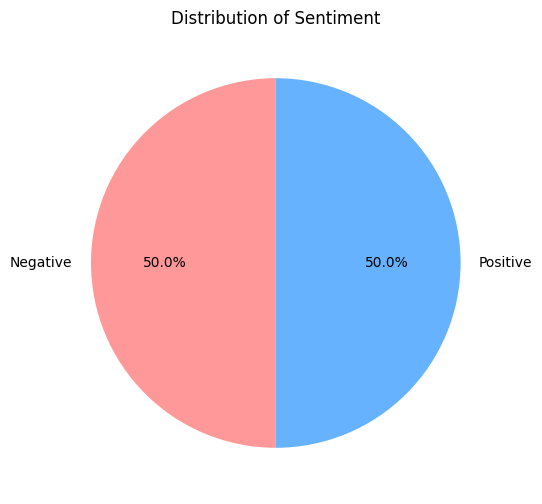

In [ ]:
# Calculate the distribution of the target variable (sentiment)
sentiment_distribution = df['target'].value_counts(normalize=True)

# Plot the distribution using a pie chart
plt.figure(figsize=(8, 6))
sentiment_distribution.plot.pie(autopct='%1.1f%%', startangle=90, labels=['Negative', 'Positive'], colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of Sentiment')
plt.ylabel('')  # Hide the 'target' label on the y-axis
plt.show()

In [ ]:
#Here,we imported all the necessary dependencies and libraries that will be needed in the course of running our codes


import re
from re import sub# regular expression
import numpy as np
import pandas as pd
import string

# for plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
import nltk.stem as stem
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
nltk.download('punkt') #Sentence Tokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


STEP 2: PREPROCESSING AND  DATA CLEANING

Text Preprocessing is an important step for a Natural Language Processing task. It transforms text into a more digestible form so that machine learning algorithms can perform better.
Again,this section is very crucial because the quality of our dataset can  greatly influence the outcome of the data analysis or machine learning process as it ensures that the data is in the best possible shape for extracting insights, building models, and making informed decisions.
To this end, we took the underlisted steps for the text prepprocessing:

• Lower Casing: Each text is converted to a lowercase.
• Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
• Replacing Emojis:We Replaced emojis by using a pre-defined dictionary containing emojis along with their meaning.
• Replacing Usernames: Replace @Usernames with word "USER" (eg: "@Kaggle" to "USER")
• Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
• Removing Consecutive letters:3 or more consecutive letters are replaced by 2 letters. *(eg: "Heyyyy" to "Heyy")
• Removing Short Words:Words with length less than 2 are removed.
•Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without     sacrificing the meaning of the sentence. *(eg: "the", "he", "have")
•Stemming:To reduce words to their root forms, we explored stemming using the Porter stemming algorithm


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Importing the Porter Stemmer


# Specifying the columns as follows:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Create a stemmer instance
stemmer = PorterStemmer()

# Function to preprocess a single text using stemming
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Replacing URLs
    text = re.sub(r'http\S+|www\S+', 'URL', text)

    # Replacing Emojis
    text = re.sub(r'😃', '', text)

    # Replacing Usernames
    text = re.sub(r'@[\w]+', 'USERNAME', text)

    # Removing Non-Alphabets and Short Words
    text = ' '.join([word for word in text.split() if word.isalpha() and len(word) > 1])

    # Removing Stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Stemming using the Porter Stemmer
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

# Apply the preprocessing function to the entire 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Now, the 'text' column in the DataFrame has been preprocessed using stemming
print(df.head(3))  # To see the updated DataFrame


Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  usernam url aurl shoulda got david carr third day  
1    scotthamilton  upset updat facebook text might cri result sch...  
2         mattycus    usernam dive mani time manag save rest go bound  


STEP 3:Analyzing the data.

Word clouds are visual representations of text data where words are displayed in different sizes and colors, with word frequency determining their prominence.Cloud creators are used to highlight popular words and phrases based on frequency and relevance in any text.We classified our texts into positive and negative wordclouds

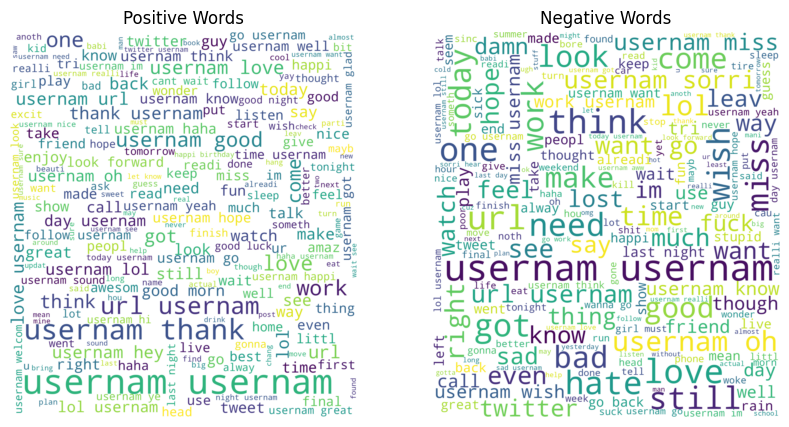

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns

# Separate positive and negative texts
positive_texts = df[df['target'] == 4]['text']  # Assuming 4 represents positive sentiment
negative_texts = df[df['target'] == 0]['text']  # Assuming 0 represents negative sentiment

# Join the texts in each category
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

# Create WordCloud objects for positive and negative words
positive_wordcloud = WordCloud(width=1800, height=2000, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=1800, height=2000, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.show()


STEP 4: Splitting the dataset

The Preprocessed Data is here divided into 2 sets of data:
1) Training Data:The dataset upon which the model would be trained on. Containing 95% of data.
2)Test Data:The dataset upon which the model would be tested against Containing 5% of data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Loading the preprocessed dataset with 'text' and 'target' columns and Splitting the dataset into training and testing sets
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Transforming the dataset

Transforming the X_train and X_test dataset into matrix of TF-IDF features by using the TF-IDF Vectoriser.
TF-IDF (Term Frequency - Inverse Document Frequency) is an algorithm that uses the frequency of words to determine how relevant those words are to a given document.It indicates what the importance of the word is in order to understand the document or dataset while a TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features.

The resultant dataset will be used to train the model and test against it.

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

This function below is where we defined how the model is going to run and the resultant confusion matrix is plotted.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the BNB model
clf = BernoulliNB()
clf.fit(X_train_tfidf, y_train)


BernoulliNB()

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the BNB model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.72284375
              precision    recall  f1-score   support

           0       0.74      0.69      0.71    159494
           4       0.71      0.75      0.73    160506

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000



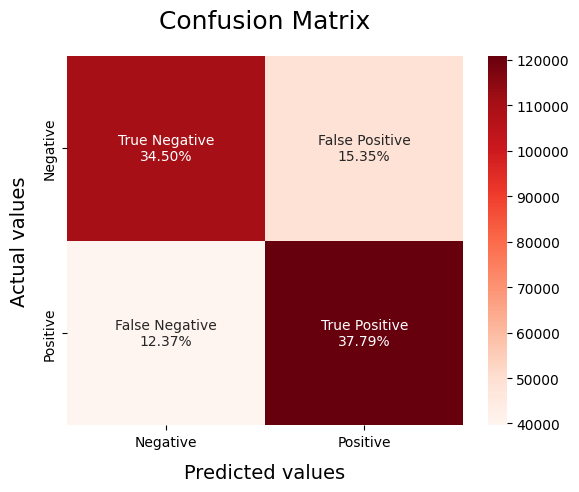

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Create labels for the confusion matrix
categories = ['Negative', 'Positive']
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot the confusion matrix
sns.heatmap(cf_matrix, annot=labels, cmap='Reds', fmt='', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

# Display the plot
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=4)  # Assuming 4 is the positive class label


In [ ]:
# Train the Bernoulli Naive Bayes model
clf = BernoulliNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.72284375
              precision    recall  f1-score   support

           0       0.74      0.69      0.71    159494
           4       0.71      0.75      0.73    160506

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000



In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have already calculated fpr and tpr using roc_curve
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")


AUC: 0.80


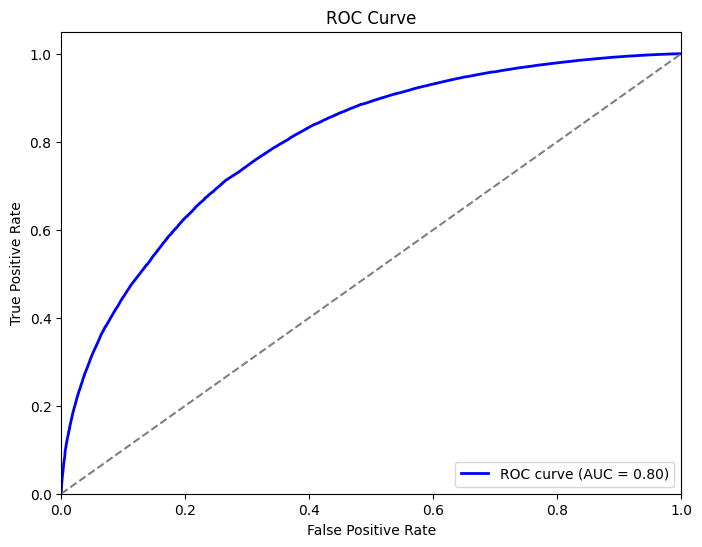

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#To test the model with a random input using the row index
row_index = 450000

# Select the row with the specified index
selected_row = df.loc[row_index]

# Access the text data from the selected row
input_text = selected_row['text']


In [ ]:
import string
import nltk
from nltk.tokenize import word_tokenize

def preprocess_input(input_text):
    # Convert to lowercase
    input_text = input_text.lower()

    # Remove punctuation
    input_text = input_text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization (if needed)
    tokens = word_tokenize(input_text)

    # You can add more preprocessing steps as needed

    return ' '.join(tokens)  # Reconstruct the preprocessed text


In [ ]:

#Specify the index of the row you want to select
row_index = 400000 # Replace with the index you want

# Select the row with the specified index
selected_row = df.loc[row_index]

# Access the text data from the selected row
input_text = selected_row['text']


In [ ]:
# Assuming input_text is a single string
input_text = selected_row['text']

# Reshape the input text to a 2D array
input_vector = vectorizer.transform([input_text])

# Make predictions
prediction = clf.predict(input_vector)

# Display the prediction
if prediction[0] == 1:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")


Predicted Sentiment: Negative


References:

https://www.w3schools.com/python/python_ml_confusion_matrix.asp
